In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error


In [53]:
df = pd.read_csv("ToyotaCorolla_test.csv")


In [54]:
df

,Price,FuelType,HP,Automatic,CC,Doors,Quarterly_Tax,Age,Weight,KM
0,5563,Petrol,110,0,1600,3,150,4,1065,50000
1,4500,Diesel,90,1,1400,5,120,5,980,70000
2,7200,Petrol,120,0,1800,3,180,2,1100,30000


In [55]:
print(df.head())
print(df.info())
print(df.describe())


   Price FuelType   HP  Automatic    CC  Doors  Quarterly_Tax  Age  Weight  \
0   5563   Petrol  110          0  1600      3            150    4    1065   
1   4500   Diesel   90          1  1400      5            120    5     980   
2   7200   Petrol  120          0  1800      3            180    2    1100   

      KM  
0  50000  
1  70000  
2  30000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          3 non-null      int64 
 1   FuelType       3 non-null      object
 2   HP             3 non-null      int64 
 3   Automatic      3 non-null      int64 
 4   CC             3 non-null      int64 
 5   Doors          3 non-null      int64 
 6   Quarterly_Tax  3 non-null      int64 
 7   Age            3 non-null      int64 
 8   Weight         3 non-null      int64 
 9   KM             3 non-null      int64 
dtypes: int64(9), object(1

In [56]:
print(df.isnull().sum())


Price            0
FuelType         0
HP               0
Automatic        0
CC               0
Doors            0
Quarterly_Tax    0
Age              0
Weight           0
KM               0
dtype: int64


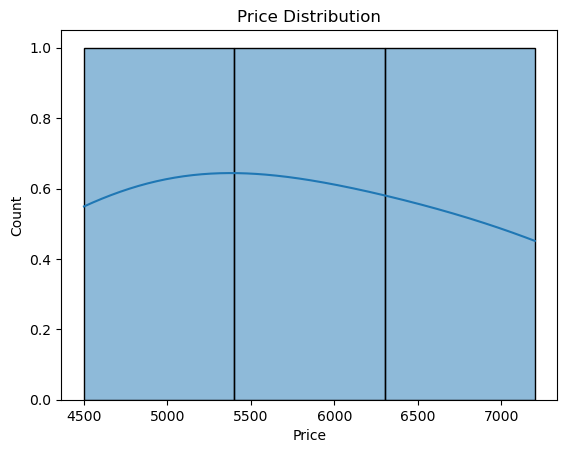

In [57]:
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()


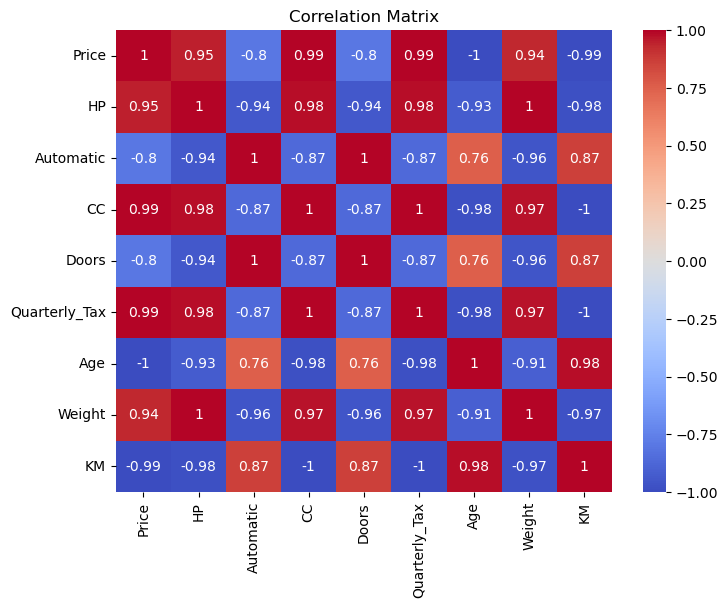

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [59]:
print(df.columns)


Index(['Price', 'FuelType', 'HP', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax',
       'Age', 'Weight', 'KM'],
      dtype='object')


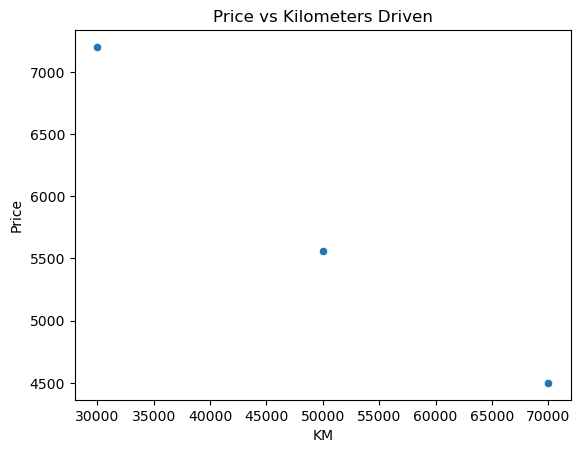

In [60]:
sns.scatterplot(x='KM', y='Price', data=df)
plt.title("Price vs Kilometers Driven")
plt.show()


In [61]:
le = LabelEncoder()
df['FuelType'] = le.fit_transform(df['FuelType'])  # e.g. Diesel=0, Petrol=1


In [62]:
df = df.dropna()


In [63]:
scaler = StandardScaler()
features_to_scale = ['KM', 'HP', 'CC', 'Quarterly_Tax', 'Age', 'Weight']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [64]:
X = df.drop(columns=['Price'])  # All except target
y = df['Price']


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [67]:
print("Total rows:", len(df))


Total rows: 3


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [69]:
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)


In [70]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


R² Score: 1.00
Mean Squared Error: 0.00


In [71]:
X = df.drop('Price', axis=1)  # Features (everything except 'Price')
y = df['Price']               # Target (what we want to predict)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [73]:
# Step 4: Verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2, 9)
X_test shape: (1, 9)
y_train shape: (2,)
y_test shape: (1,)


In [74]:
from sklearn.linear_model import LinearRegression

# Base Model 1 – All features
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Print coefficients with feature names
print("Model 1 Coefficients (All Features):")
for feature, coef in zip(X_train.columns, model1.coef_):
    print(f"{feature}: {coef:.2f}")


Model 1 Coefficients (All Features):
FuelType: 65.47
HP: 157.47
Automatic: -65.47
CC: 160.36
Doors: -130.93
Quarterly_Tax: 160.36
Age: -157.47
Weight: 155.91
KM: -160.36


In [75]:
# Select only numeric features
numeric_features = ['HP', 'CC', 'Doors', 'Quarterly_Tax', 'Age', 'Weight', 'KM']
model2 = LinearRegression()
model2.fit(X_train[numeric_features], y_train)

print("\nModel 2 Coefficients (Numeric Features Only):")
for feature, coef in zip(numeric_features, model2.coef_):
    print(f"{feature}: {coef:.2f}")



Model 2 Coefficients (Numeric Features Only):
HP: 165.49
CC: 168.53
Doors: -137.60
Quarterly_Tax: 168.53
Age: -165.49
Weight: 163.85
KM: -168.53


In [76]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split again after encoding
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Model 3 – With encoded categorical variables
model3 = LinearRegression()
model3.fit(X_train_enc, y_train_enc)

print("\nModel 3 Coefficients (With Encoded Categorical Features):")
for feature, coef in zip(X_train_enc.columns, model3.coef_):
    print(f"{feature}: {coef:.2f}")



Model 3 Coefficients (With Encoded Categorical Features):
FuelType: 65.47
HP: 157.47
Automatic: -65.47
CC: 160.36
Doors: -130.93
Quarterly_Tax: 160.36
Age: -157.47
Weight: 155.91
KM: -160.36


In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n📊 Evaluation of {model_name}:")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")


In [78]:
print(len(X_test))
print(len(y_test))


1
1


In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))


Length of X_test: 1
Length of y_test: 1


In [80]:
from sklearn.model_selection import train_test_split


X = df.drop('Price', axis=1)
y = df['Price']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))


Length of X_test: 1
Length of y_test: 1


In [81]:
print("Total dataset size:", len(df))
print("Test set size:", len(X_test))


Total dataset size: 3
Test set size: 1


In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)


In [83]:
print(y.values)


[5563 4500 7200]


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score
import numpy as np

model = LinearRegression()
loo = LeaveOneOut()

mae_scores = cross_val_score(model, X, y, cv=loo, scoring='neg_mean_absolute_error')

print("LOOCV MAE scores:", -mae_scores)
print("Average LOOCV MAE score:", -np.mean(mae_scores))


LOOCV MAE scores: [ 560.75110848  583.27080831 1107.86275731]
Average LOOCV MAE score: 750.628224700699


In [85]:

final_model = LinearRegression()
final_model.fit(X, y)


predictions = final_model.predict(X)

for actual, pred in zip(y, predictions):
    print(f"Actual: {actual}, Predicted: {pred:.2f}")


Actual: 5563, Predicted: 5563.00
Actual: 4500, Predicted: 4500.00
Actual: 7200, Predicted: 7200.00


In [86]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import LeaveOneOut, cross_val_score
import numpy as np


In [87]:
lasso = Lasso(alpha=0.1)  
ridge = Ridge(alpha=1.0)   


In [88]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeaveOneOut, cross_val_score
import numpy as np

loo = LeaveOneOut()

lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.5, max_iter=10000))
ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))


lasso_mae_scores = cross_val_score(lasso, X, y, cv=loo, scoring='neg_mean_absolute_error')
print("LOOCV Lasso MAE scores:", -lasso_mae_scores)
print("Average LOOCV Lasso MAE score:", -np.mean(lasso_mae_scores))

ridge_mae_scores = cross_val_score(ridge, X, y, cv=loo, scoring='neg_mean_absolute_error')
print("LOOCV Ridge MAE scores:", -ridge_mae_scores)
print("Average LOOCV Ridge MAE score:", -np.mean(ridge_mae_scores))


LOOCV Lasso MAE scores: [1636.5 2208.5 1637.5]
Average LOOCV Lasso MAE score: 1827.4999999999993
LOOCV Ridge MAE scores: [ 772.52631579  870.81868132 1003.47832817]
Average LOOCV Ridge MAE score: 882.2744417605096


INTERVIEW QUESTIONS:

1. What is Normalization & Standardization and how is it helpful?

Normalization and Standardization are techniques used to rescale or transform features in a dataset. This is especially important in machine learning algorithms that are sensitive to the scale of input features (e.g., k-NN, SVM, Gradient Descent-based models like Linear Regression, Logistic Regression, Neural Networks).

Normalization:
Definition: Rescales the data to a fixed range, usually [0, 1].

Formula:

𝑥
𝑛
𝑜
𝑟
𝑚
=
𝑥
−
𝑥
𝑚
𝑖
𝑛
𝑥
𝑚
𝑎
𝑥
−
𝑥
𝑚
𝑖
𝑛
x
norm
	​

=
x
max
	​

−x
min
	​

x−x
min
	​

	​


When to Use:

When you don't know the distribution of the data.

When features have different scales and you want to bring them to the same scale for distance-based algorithms like k-NN or clustering.
Standardization:

Definition: Transforms data to have zero mean and unit variance.

Formula:

𝑥
𝑠
𝑡
𝑑
=
𝑥
−
𝜇
𝜎
x
std
	​

=
σ
x−μ
	​


where 
𝜇
μ is the mean and 
𝜎
σ is the standard deviation.

When to Use:

When your data follows a Gaussian (normal) distribution or approximately so.
Often preferred in linear models, logistic regression, and algorithms assuming normally distributed features.


2. What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when independent variables are highly correlated, leading to unstable and unreliable coefficient estimates.
Techniques to address it:

Remove highly correlated predictors:

Use correlation matrices or Variance Inflation Factor (VIF) to identify and remove/reduce correlated features.

Principal Component Analysis (PCA):

Transforms correlated variables into a smaller set of uncorrelated components (principal components).

Useful when interpretability is not the main concern.

Regularization techniques:

Ridge Regression (L2): Shrinks coefficients and handles multicollinearity well.

Lasso Regression (L1): Performs variable selection by forcing some coefficients to be exactly zero.

Elastic Net: Combination of Ridge and Lasso.

Combine correlated features:

Manually or automatically combine highly correlated features (e.g., summing or averaging similar variables).

Domain knowledge:Use understanding of the data to retain only the most meaningful variables and remove redundant ones.